## Writing functions to forecast food prices in Rwanda
<p>Every time I go to the supermarket, my wallet weeps a little. But how expensive is food around the world? In this notebook, we'll explore time series of food prices in Rwanda from the <a href="https://data.humdata.org/dataset/wfp-food-prices">United Nations Humanitarian Data Exchange Global Food Price Database</a>. Agriculture makes up over 30% of Rwanda's economy, and over 60% of its export earnings (<a href="https://www.cia.gov/library/publications/the-world-factbook/geos/rw.html">CIA World Factbook</a>), so the price of food is very important to the livelihood of many Rwandans.</p>
<p>The map below shows the layout of Rwanda; it is split into five administrative regions. The central area around the Capital city, Kigali, is one region, and the others are North, East, South, and West.</p>
<p><img src="https://assets.datacamp.com/production/project_1008/img/RwandaGeoProvinces.png" alt="A map of the five administrative regions of Rwanda"></p>
<p>In this notebook, we're going to import, manipulate and forecast Rwandan sorghum price data. We'll also wrap our analysis into functions to make it easy to analyze prices of other foods.</p>
<p>The sorghum data is stored in the file <code>datasets/Sorghum.csv</code>. Each row contains the price of sorghum at one market on one day. It contains 18 columns.</p>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th style="text-align:left;">meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>adm0_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Country code. Always 215.</td>
</tr>
<tr>
<td style="text-align:left;"><code>adm0_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Country name. Always "Rwanda".</td>
</tr>
<tr>
<td style="text-align:left;"><code>adm1_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Region code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>adm1_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Region name.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mkt_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Market code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mkt_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Market name.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cm_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Commodity code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cm_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Commodity name.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cur_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Currency code. Always 77.</td>
</tr>
<tr>
<td style="text-align:left;"><code>cur_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Currency name. Always "RWF".</td>
</tr>
<tr>
<td style="text-align:left;"><code>pt_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Price type code. Always 15.</td>
</tr>
<tr>
<td style="text-align:left;"><code>pt_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Price type name. Always "Retail".</td>
</tr>
<tr>
<td style="text-align:left;"><code>um_id</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Unit of measurement code.</td>
</tr>
<tr>
<td style="text-align:left;"><code>um_name</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Unit of measurement name. Always "KG".</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_month</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Month when price occurred.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_year</code></td>
<td><code>int</code></td>
<td style="text-align:left;">Year when price occurred. 2008 to 2015.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_price</code></td>
<td><code>dbl</code></td>
<td style="text-align:left;">Price of 1 unit of commodity in currency.</td>
</tr>
<tr>
<td style="text-align:left;"><code>mp_commoditysource</code></td>
<td><code>chr</code></td>
<td style="text-align:left;">Data source. Always "MINAGRI".</td>
</tr>
</tbody>
</table>

In [24]:
# Use this cell to begin your analysis, and add as many as you would like!
dir("datasets")

[1] "Beans (dry).csv"        "Cassava.csv"            "Chili (red).csv"       
[4] "Maize.csv"              "Oranges (big size).csv" "Peas (fresh).csv"      
[7] "Potatoes (Irish).csv"   "Sorghum.csv"            "Tomatoes.csv"

# Setup

In [26]:
library(readr)
library(data.table)
library(lubridate)
library(ggplot2)
library(dplyr)
library(forecast)

# Warmup tasks

In [27]:
sorghum <- read_csv('datasets//Sorghum.csv')

glimpse(sorghum)

Parsed with column specification:
cols(
  adm0_id = col_double(),
  adm0_name = col_character(),
  adm1_id = col_double(),
  adm1_name = col_character(),
  mkt_id = col_double(),
  mkt_name = col_character(),
  cm_id = col_double(),
  cm_name = col_character(),
  cur_id = col_double(),
  cur_name = col_character(),
  pt_id = col_double(),
  pt_name = col_character(),
  um_id = col_double(),
  um_name = col_character(),
  mp_month = col_double(),
  mp_year = col_double(),
  mp_price = col_double(),
  mp_commoditysource = col_character()
)


Rows: 4,099
Columns: 18
$ adm0_id            <dbl> 205, 205, 205, 205, 205, 205, 205, 205, 205, 205...
$ adm0_name          <chr> "Rwanda", "Rwanda", "Rwanda", "Rwanda", "Rwanda"...
$ adm1_id            <dbl> 21973, 21973, 21973, 21973, 21973, 21973, 21973,...
$ adm1_name          <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", ...
$ mkt_id             <dbl> 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, ...
$ mkt_name           <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Bir...
$ cm_id              <dbl> 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, ...
$ cm_name            <chr> "Sorghum", "Sorghum", "Sorghum", "Sorghum", "Sor...
$ cur_id             <dbl> 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, ...
$ cur_name           <chr> "RWF", "RWF", "RWF", "RWF", "RWF", "RWF", "RWF",...
$ pt_id              <dbl> 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ...
$ pt_name            <chr> "Retail", "Retail", "Retail", "Retail", "Retail"...
$ um_id              <dbl> 5

In [28]:
# add date column with year and month as date object
sorghum <- sorghum %>%
    mutate(date = ymd(paste(mp_year, mp_month, "01")))
glimpse(sorghum)

Rows: 4,099
Columns: 19
$ adm0_id            <dbl> 205, 205, 205, 205, 205, 205, 205, 205, 205, 205...
$ adm0_name          <chr> "Rwanda", "Rwanda", "Rwanda", "Rwanda", "Rwanda"...
$ adm1_id            <dbl> 21973, 21973, 21973, 21973, 21973, 21973, 21973,...
$ adm1_name          <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", ...
$ mkt_id             <dbl> 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, ...
$ mkt_name           <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Bir...
$ cm_id              <dbl> 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, ...
$ cm_name            <chr> "Sorghum", "Sorghum", "Sorghum", "Sorghum", "Sor...
$ cur_id             <dbl> 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, ...
$ cur_name           <chr> "RWF", "RWF", "RWF", "RWF", "RWF", "RWF", "RWF",...
$ pt_id              <dbl> 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ...
$ pt_name            <chr> "Retail", "Retail", "Retail", "Retail", "Retail"...
$ um_id              <dbl> 5

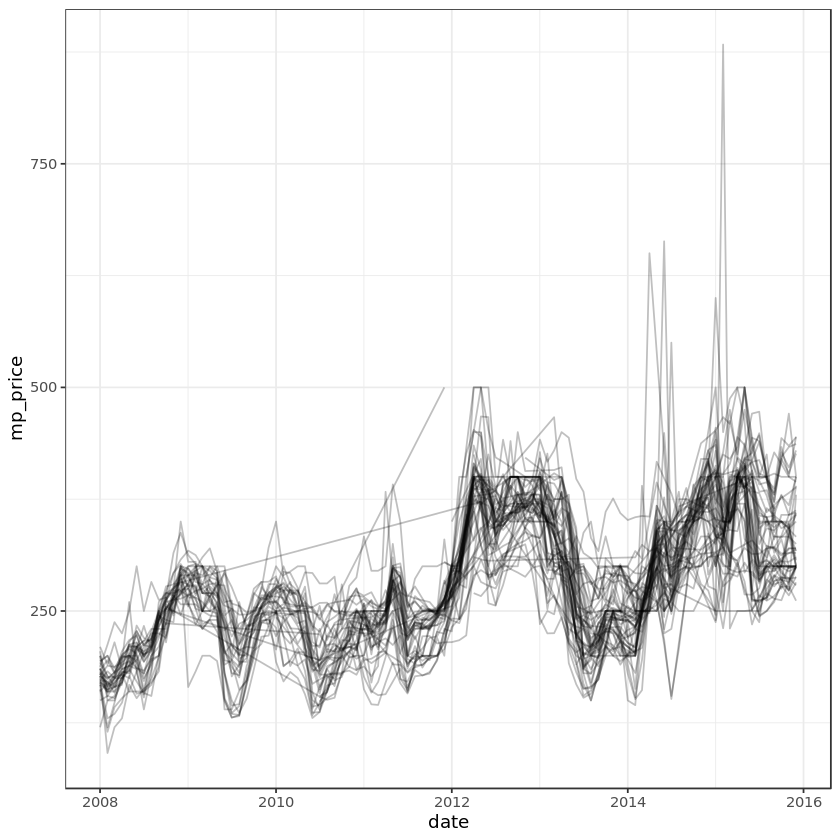

In [29]:
# graph line plot of price over time for each market
ggplot(sorghum, aes(x=date, y=mp_price, group=mkt_name)) +
    geom_line(alpha=0.25) +
    theme_bw()

In [30]:
# calculate the medium price on each date
sorghum_median_price_by_date <- sorghum %>%
    group_by(date) %>%
    summarize(median_price_rwf = median(mp_price))

`summarise()` ungrouping output (override with `.groups` argument)


In [31]:
# create time series of median price by month

first_date <- min(sorghum_median_price_by_date$date)
last_date <- max(sorghum_median_price_by_date$date)

sorghum_ts <- ts(
    sorghum_median_price_by_date$median_price_rwf,
    start = c(year(first_date), month(first_date)),
    end = c(year(last_date), month(last_date)),
    frequency = 12
)

In [32]:
forecast(sorghum_ts)

         Point Forecast      Lo 80    Hi 80        Lo 95    Hi 95
Jan 2016       307.9121 284.046862 331.7773  271.4133862 344.4107
Feb 2016       297.1746 262.071187 332.2779  243.4885868 350.8605
Mar 2016       297.7977 251.544532 344.0508  227.0596039 368.5357
Apr 2016       307.0315 248.131491 365.9314  216.9517324 397.1112
May 2016       309.4047 238.664487 380.1450  201.2168618 417.5926
Jun 2016       276.9982 203.279192 350.7171  164.2547236 389.7416
Jul 2016       245.8318 170.960910 320.7026  131.3266734 360.3369
Aug 2016       248.6999 163.139501 334.2604  117.8465481 379.5533
Sep 2016       258.1901 158.887619 357.4926  106.3200623 410.0601
Oct 2016       264.0277 151.463285 376.5922   91.8752635 436.1802
Nov 2016       270.3264 143.481817 397.1709   76.3343726 464.3183
Dec 2016       270.0375 131.428890 408.6461   58.0539140 482.0211
Jan 2017       263.6986 116.411947 410.9852   38.4431117 488.9541
Feb 2017       255.0584 100.757980 409.3589   19.0762507 491.0406
Mar 2017  

# Tested task 1

In [33]:
# write a function that gets median price by date and creates a forecast from any csv
get_median_price_by_date <- function(filepath) {
    commodity <- read_csv(filepath, col_types = cols())
    
    commodity <- commodity %>%
        mutate(date = ymd(paste(mp_year, mp_month, "01")))
    
    commodity %>%
        group_by(date) %>%
        summarize(median_price_rwf = median(mp_price), .groups = "drop_last")
}

In [46]:
sorghum_median_price_by_date <- get_median_price_by_date("datasets/Sorghum.csv")

In [35]:
cassava_median_price_by_date <- get_median_price_by_date("datasets/Cassava.csv")

In [36]:
potatoes_median_price_by_date <- get_median_price_by_date("datasets/Potatoes (Irish).csv")

# Tested task 2

In [37]:
# create function forecast_price to get median price by date

forecast_price <- function(commodity_median_price_by_date) {
    first_date <- min(commodity_median_price_by_date$date)
    last_date <- max(commodity_median_price_by_date$date)

    commodity_ts <- ts(
        commodity_median_price_by_date$median_price_rwf,
        start = c(year(first_date), month(first_date)),
        end = c(year(last_date), month(last_date)),
        frequency = 12
    )
    forecast(commodity_ts)
}

In [38]:
forecast_price(sorghum_median_price_by_date)

         Point Forecast      Lo 80    Hi 80        Lo 95    Hi 95
Jan 2016       307.9121 284.046862 331.7773  271.4133862 344.4107
Feb 2016       297.1746 262.071187 332.2779  243.4885868 350.8605
Mar 2016       297.7977 251.544532 344.0508  227.0596039 368.5357
Apr 2016       307.0315 248.131491 365.9314  216.9517324 397.1112
May 2016       309.4047 238.664487 380.1450  201.2168618 417.5926
Jun 2016       276.9982 203.279192 350.7171  164.2547236 389.7416
Jul 2016       245.8318 170.960910 320.7026  131.3266734 360.3369
Aug 2016       248.6999 163.139501 334.2604  117.8465481 379.5533
Sep 2016       258.1901 158.887619 357.4926  106.3200623 410.0601
Oct 2016       264.0277 151.463285 376.5922   91.8752635 436.1802
Nov 2016       270.3264 143.481817 397.1709   76.3343726 464.3183
Dec 2016       270.0375 131.428890 408.6461   58.0539140 482.0211
Jan 2017       263.6986 116.411947 410.9852   38.4431117 488.9541
Feb 2017       255.0584 100.757980 409.3589   19.0762507 491.0406
Mar 2017  

In [39]:
forecast_price(cassava_median_price_by_date)

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Jan 2016       225.0163 205.2698 244.7627 194.81671 255.2159
Feb 2016       225.0163 197.1518 252.8807 182.40129 267.6313
Mar 2016       225.0163 190.8883 259.1443 172.82200 277.2106
Apr 2016       225.0163 185.5852 264.4474 164.71163 285.3209
May 2016       225.0163 180.8948 269.1378 157.53829 292.4943
Jun 2016       225.0163 176.6385 273.3941 151.02880 299.0038
Jul 2016       225.0163 172.7101 277.3225 145.02081 305.0118
Aug 2016       225.0163 169.0404 280.9922 139.40854 310.6240
Sep 2016       225.0163 165.5815 284.4511 134.11857 315.9140
Oct 2016       225.0163 162.2983 287.7342 129.09746 320.9351
Nov 2016       225.0163 159.1646 290.8679 124.30487 325.7277
Dec 2016       225.0163 156.1599 293.8727 119.70951 330.3231
Jan 2017       225.0163 153.2678 296.7647 115.28651 334.7461
Feb 2017       225.0163 150.4753 299.5573 111.01572 339.0169
Mar 2017       225.0163 147.7715 302.2611 106.88053 343.1520
Apr 2017       225.0163 

In [40]:
forecast_price(potatoes_median_price_by_date)

         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 2016       190.0093 171.35706 208.6615 161.48317 218.5354
Feb 2016       202.6099 174.14582 231.0740 159.07783 246.1420
Mar 2016       220.0317 181.72222 258.3413 161.44238 278.6211
Apr 2016       231.5932 184.48380 278.7026 159.54559 303.6408
May 2016       226.2626 174.20438 278.3209 146.64641 305.8789
Jun 2016       229.1587 170.73454 287.5829 139.80665 318.5108
Jul 2016       230.8787 166.57270 295.1848 132.53113 329.2263
Aug 2016       251.1739 175.53815 326.8096 135.49902 366.8487
Sep 2016       279.3573 189.13187 369.5827 141.36943 417.3451
Oct 2016       262.7887 172.33073 353.2467 124.44516 401.1323
Nov 2016       236.0485 149.89274 322.2042 104.28465 367.8123
Dec 2016       205.0924 126.05584 284.1290  84.21640 325.9684
Jan 2017       205.0036 121.88813 288.1190  77.88948 332.1177
Feb 2017       218.4941 125.58323 311.4050  76.39917 360.5891
Mar 2017       237.1698 131.67270 342.6669  75.82591 398.5137
Apr 2017

# data.table alternative

In [41]:
# import csv
sorghum <- fread('datasets//Sorghum.csv')
glimpse(sorghum)

Rows: 4,099
Columns: 18
$ adm0_id            <int> 205, 205, 205, 205, 205, 205, 205, 205, 205, 205...
$ adm0_name          <chr> "Rwanda", "Rwanda", "Rwanda", "Rwanda", "Rwanda"...
$ adm1_id            <int> 21973, 21973, 21973, 21973, 21973, 21973, 21973,...
$ adm1_name          <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", ...
$ mkt_id             <int> 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, ...
$ mkt_name           <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Bir...
$ cm_id              <int> 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, ...
$ cm_name            <chr> "Sorghum", "Sorghum", "Sorghum", "Sorghum", "Sor...
$ cur_id             <int> 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, ...
$ cur_name           <chr> "RWF", "RWF", "RWF", "RWF", "RWF", "RWF", "RWF",...
$ pt_id              <int> 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ...
$ pt_name            <chr> "Retail", "Retail", "Retail", "Retail", "Retail"...
$ um_id              <int> 5

In [42]:
# create date column
sorghum[j = date := ymd(paste(mp_year, mp_month, "01"))]
glimpse(sorghum)

Rows: 4,099
Columns: 19
$ adm0_id            <int> 205, 205, 205, 205, 205, 205, 205, 205, 205, 205...
$ adm0_name          <chr> "Rwanda", "Rwanda", "Rwanda", "Rwanda", "Rwanda"...
$ adm1_id            <int> 21973, 21973, 21973, 21973, 21973, 21973, 21973,...
$ adm1_name          <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", ...
$ mkt_id             <int> 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, ...
$ mkt_name           <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Bir...
$ cm_id              <int> 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, ...
$ cm_name            <chr> "Sorghum", "Sorghum", "Sorghum", "Sorghum", "Sor...
$ cur_id             <int> 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, ...
$ cur_name           <chr> "RWF", "RWF", "RWF", "RWF", "RWF", "RWF", "RWF",...
$ pt_id              <int> 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ...
$ pt_name            <chr> "Retail", "Retail", "Retail", "Retail", "Retail"...
$ um_id              <int> 5

In [43]:
# get median price by date
sorghum[j = .(median_price_rwf = median(mp_price)), by = date]

date,median_price_rwf
<date>,<dbl>
2010-11-01,225.0000
2010-12-01,233.8125
2011-01-01,238.9000
2011-02-01,228.3333
2011-03-01,232.5000
2011-04-01,244.5000
2011-05-01,279.2500
2011-06-01,253.6667
2011-07-01,218.2083
